In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import pairwise_distances
%matplotlib inline

In [2]:
train_normal = pd.read_csv('./data/normal_training.csv')

In [3]:
test_faulty = pd.read_csv('./data/faulty_testing.csv')

In [4]:
# data preparing
df_train = train_normal[(train_normal.simulationRun>=1)].iloc[:500,3:]

df_test = train_normal[(train_normal.simulationRun>5)&(train_normal.simulationRun<10)].iloc[:,3:].reset_index(drop=True)
# IDV = 1
# df_test = test_faulty[(test_faulty.faultNumber==IDV) & 
#                                (test_faulty.simulationRun==1)].iloc[:,3:]

In [5]:
def scl_pick(name, data):
    """
    the several option for name:
    -std
    -minmax
    -robust
    -norm
    -pwr
    """
    if name == 'std':
        std_scl = StandardScaler().fit(data)
        df_scl = std_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'minmax':
        MM_scl = MinMaxScaler().fit(data)
        df_scl = MM_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'robust':
        rb_scl = RobustScaler().fit(data)
        df_scl = rb_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'norm': ##### xxxxxx
        df_norm = Normalizer().fit(data)
        df_scl = df_norm.transform(data)
        df_scl = pd.DataFrame(df_scl)
    else:
        pt_scl = PowerTransformer().fit(data)
        df_scl = pt_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    return df_scl

In [6]:
nComponent = 16 # 30
nSamples = df_train.shape[0]
conf_T2 = 0.95 # 0.99

In [7]:
df_scl = scl_pick('std', df_train)

In [23]:
IDV = 1
df_test = test_faulty[(test_faulty.faultNumber==IDV) & 
                               (test_faulty.simulationRun==1)].iloc[:,3:]

In [24]:
dtst = scl_pick('std', df_test)

In [8]:
def kernelFunc(name, x, y):
    """
    - Linear : lin
    - Gaussian : gauss
    - Polynomial : poly
    - Sigmoid : sig
    - Laplacian : lap
    """
    gamma = 0.1
    offset = 0
    if name == 'lin':
        lin = x@y.T
        Kdat = lin
        
    elif name == 'gauss':
        pdist_gs = pairwise_distances(x, y, metric='sqeuclidean')
        gaus = np.exp(-gamma*pdist_gs)
        Kdat = gaus
        
    elif name == 'poly':
        poly = gamma*x@y.T+offset
        powr = np.power(poly,2)
        fpoly = poly+powr
        Kdat = fpoly
        
    elif name == 'sig':
        sig = gamma*x@y.T+offset
        fsig = np.tanh(sig)
        Kdat = fsig
        
    elif name == 'lap':
        pdist_lap = pairwise_distances(x, y, metric='cityblock')
        lap = np.exp(-gamma*pdist_lap)
        Kdat = lap
        
    return Kdat

In [9]:
K = kernelFunc('gauss', df_scl, df_scl)

In [10]:
K

array([[1.00000000e+00, 5.54932851e-02, 2.26569364e-02, ...,
        2.30713244e-02, 8.62905812e-03, 1.19570302e-03],
       [5.54932851e-02, 1.00000000e+00, 1.03695024e-02, ...,
        1.74256530e-03, 1.29295960e-03, 9.08310915e-04],
       [2.26569364e-02, 1.03695024e-02, 1.00000000e+00, ...,
        9.49673322e-04, 1.83007699e-03, 1.84790770e-04],
       ...,
       [2.30713244e-02, 1.74256530e-03, 9.49673322e-04, ...,
        1.00000000e+00, 5.64087945e-03, 3.16629433e-04],
       [8.62905812e-03, 1.29295960e-03, 1.83007699e-03, ...,
        5.64087945e-03, 1.00000000e+00, 2.56041057e-02],
       [1.19570302e-03, 9.08310915e-04, 1.84790770e-04, ...,
        3.16629433e-04, 2.56041057e-02, 1.00000000e+00]])

In [11]:
K = pd.DataFrame(K)

In [12]:
K = round(K, 4)

In [13]:
K

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0000,0.0555,0.0227,0.0109,0.0239,0.0014,0.0192,0.0187,0.0036,0.0023,...,0.0058,0.0066,0.0001,0.0011,0.0027,0.0007,0.0093,0.0231,0.0086,0.0012
1,0.0555,1.0000,0.0104,0.0391,0.0061,0.0005,0.0411,0.0226,0.0013,0.0018,...,0.0040,0.0024,0.0003,0.0003,0.0036,0.0186,0.0326,0.0017,0.0013,0.0009
2,0.0227,0.0104,1.0000,0.1485,0.0011,0.0005,0.0075,0.0206,0.0002,0.0008,...,0.0037,0.0021,0.0012,0.0000,0.0036,0.0009,0.0029,0.0009,0.0018,0.0002
3,0.0109,0.0391,0.1485,1.0000,0.0008,0.0002,0.0156,0.0126,0.0002,0.0003,...,0.0023,0.0018,0.0008,0.0001,0.0016,0.0047,0.0033,0.0003,0.0004,0.0004
4,0.0239,0.0061,0.0011,0.0008,1.0000,0.0446,0.0007,0.0003,0.0005,0.0002,...,0.0005,0.0007,0.0000,0.0000,0.0004,0.0002,0.0009,0.0022,0.0003,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0007,0.0186,0.0009,0.0047,0.0002,0.0000,0.0014,0.0007,0.0004,0.0004,...,0.0002,0.0001,0.0001,0.0000,0.0105,1.0000,0.0045,0.0001,0.0016,0.0005
496,0.0093,0.0326,0.0029,0.0033,0.0009,0.0001,0.0025,0.0025,0.0001,0.0001,...,0.0014,0.0008,0.0003,0.0001,0.0008,0.0045,1.0000,0.0635,0.0021,0.0001
497,0.0231,0.0017,0.0009,0.0003,0.0022,0.0001,0.0004,0.0003,0.0001,0.0000,...,0.0002,0.0007,0.0003,0.0004,0.0001,0.0001,0.0635,1.0000,0.0056,0.0003
498,0.0086,0.0013,0.0018,0.0004,0.0003,0.0001,0.0008,0.0005,0.0005,0.0001,...,0.0002,0.0001,0.0003,0.0000,0.0019,0.0016,0.0021,0.0056,1.0000,0.0256


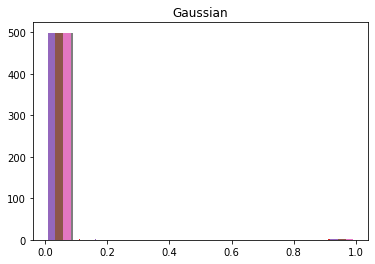

In [14]:
plt.hist(K)
plt.title('Gaussian')
plt.show()

In [15]:
K = kernelFunc('lin', df_scl, df_scl)
K = pd.DataFrame(K)
K = round(K, 4)
K

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,11.2546,-1.0061,0.0674,-2.9111,7.1808,2.8010,0.0057,1.4510,0.4063,1.5802,...,0.5930,3.8502,-9.1364,4.2919,-3.3995,-10.6717,-3.1036,5.0830,-1.1397,-2.0652
1,-1.0061,15.6481,-1.6439,5.6558,2.5903,-0.4408,6.0022,4.6069,-2.4341,2.6042,...,0.9103,1.0257,-2.7119,0.1541,0.3194,8.1394,5.3727,-5.6364,-8.4340,-1.2430
2,0.0674,-1.6439,26.7531,17.8784,-0.3144,5.1255,3.0532,9.6956,-6.1012,3.9284,...,6.0349,5.8823,9.4580,-6.5917,5.7670,-1.7374,-1.2486,-3.1189,-1.1444,-3.6523
3,-2.9111,5.6558,17.8784,28.0756,-1.2179,1.0285,7.3694,7.8788,-6.3967,-0.0440,...,4.3926,5.6318,7.7203,0.8116,2.4675,7.4404,0.0878,-8.0281,-7.5140,1.3202
4,7.1808,2.5903,-0.3144,-1.2179,40.4632,34.7838,-1.6998,-4.6655,5.3079,4.0269,...,2.6487,6.9229,-7.3993,0.6240,1.2561,-2.8091,-0.0297,7.9712,-3.6725,2.6617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-10.6717,8.1394,-1.7374,7.4404,-2.8091,-4.6987,1.3551,-0.1489,3.5153,8.0465,...,-0.7640,-4.2109,3.4619,-6.7193,18.0342,40.4634,7.8603,-8.1576,4.9551,8.0359
496,-3.1036,5.3727,-1.2486,0.0878,-0.0297,-1.6336,-1.1372,0.5024,-8.1360,-5.7611,...,2.4612,2.0566,3.4044,-1.0325,-0.6508,7.8603,29.3335,19.1863,0.8289,-3.4576
497,5.0830,-5.6364,-3.1189,-8.0281,7.9712,2.7138,-6.1559,-6.8423,-4.2052,-12.1509,...,-2.6193,4.9957,6.7108,11.2941,-6.0442,-8.1576,19.1863,36.6030,9.4090,3.9652
498,-1.1397,-8.4340,-1.1444,-7.5140,-3.6725,-1.2937,-4.3835,-4.9696,2.1950,-4.8472,...,-4.1391,-8.8627,6.1837,-2.5521,6.3513,4.9551,0.8289,9.4090,33.9922,24.6237


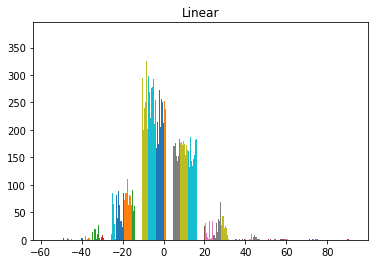

In [16]:
plt.hist(K)
plt.title('Linear')
plt.show()

In [17]:
K = kernelFunc('poly', df_scl, df_scl)
K = pd.DataFrame(K)
K = round(K, 4)
K

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,2.3921,-0.0905,0.0068,-0.2064,1.2337,0.3586,0.0006,0.1661,0.0423,0.1830,...,0.0628,0.5333,-0.0789,0.6134,-0.2244,0.0717,-0.2140,0.7667,-0.1010,-0.1639
1,-0.0905,4.0134,-0.1374,0.8855,0.3261,-0.0421,0.9605,0.6729,-0.1842,0.3282,...,0.0993,0.1131,-0.1976,0.0156,0.0330,1.4764,0.8259,-0.2459,-0.1321,-0.1088
2,0.0068,-0.1374,9.8326,4.9842,-0.0304,0.7752,0.3985,1.9096,-0.2379,0.5472,...,0.9677,0.9343,1.8403,-0.2247,0.9093,-0.1436,-0.1093,-0.2146,-0.1013,-0.2318
3,-0.2064,0.8855,4.9842,10.6899,-0.1070,0.1134,1.2800,1.4086,-0.2305,-0.0044,...,0.6322,0.8804,1.3681,0.0878,0.3076,1.2976,0.0089,-0.1583,-0.1868,0.1495
4,1.2337,0.3261,-0.0304,-0.1070,20.4191,15.5775,-0.1411,-0.2489,0.8125,0.5648,...,0.3350,1.1715,-0.1924,0.0663,0.1414,-0.2020,-0.0030,1.4325,-0.2324,0.3370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0717,1.4764,-0.1436,1.2976,-0.2020,-0.2491,0.1539,-0.0147,0.4751,1.4521,...,-0.0706,-0.2438,0.4660,-0.2204,5.0557,20.4192,1.4039,-0.1503,0.7410,1.4494
496,-0.2140,0.8259,-0.1093,0.0089,-0.0030,-0.1367,-0.1008,0.0528,-0.1517,-0.2442,...,0.3067,0.2480,0.4563,-0.0926,-0.0608,1.4039,11.5379,5.5998,0.0898,-0.2262
497,0.7667,-0.2459,-0.2146,-0.1583,1.4325,0.3450,-0.2366,-0.2161,-0.2437,0.2613,...,-0.1933,0.7491,1.1214,2.4050,-0.2391,-0.1503,5.5998,17.0581,1.8262,0.5537
498,-0.1010,-0.1321,-0.1013,-0.1868,-0.2324,-0.1126,-0.2462,-0.2500,0.2677,-0.2498,...,-0.2426,-0.1008,1.0008,-0.1901,1.0385,0.7410,0.0898,1.8262,14.9539,8.5256


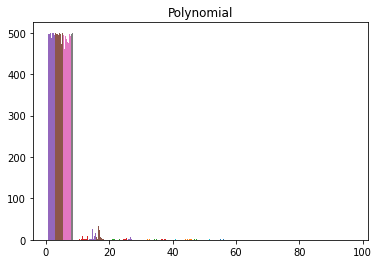

In [18]:
plt.hist(K)
plt.title('Polynomial')
plt.show()

In [19]:
K = kernelFunc('sig', df_scl, df_scl)
K = pd.DataFrame(K)
K = round(K, 4)
K

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.8095,-0.1003,0.0067,-0.2832,0.6157,0.2730,0.0006,0.1441,0.0406,0.1567,...,0.0592,0.3671,-0.7229,0.4046,-0.3274,-0.7884,-0.3008,0.4686,-0.1135,-0.2036
1,-0.1003,0.9162,-0.1629,0.5121,0.2534,-0.0441,0.5372,0.4306,-0.2387,0.2547,...,0.0908,0.1022,-0.2647,0.0154,0.0319,0.6718,0.4909,-0.5107,-0.6876,-0.1237
2,0.0067,-0.1629,0.9906,0.9455,-0.0314,0.4719,0.2962,0.7485,-0.5442,0.3738,...,0.5395,0.5286,0.7379,-0.5778,0.5203,-0.1720,-0.1242,-0.3022,-0.1139,-0.3498
3,-0.2832,0.5121,0.9455,0.9927,-0.1212,0.1025,0.6273,0.6572,-0.5647,-0.0044,...,0.4130,0.5103,0.6481,0.0810,0.2419,0.6316,0.0088,-0.6656,-0.6360,0.1313
4,0.6157,0.2534,-0.0314,-0.1212,0.9994,0.9981,-0.1684,-0.4354,0.4860,0.3822,...,0.2588,0.5994,-0.6291,0.0623,0.1250,-0.2737,-0.0030,0.6624,-0.3516,0.2601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.7884,0.6718,-0.1720,0.6316,-0.2737,-0.4381,0.1347,-0.0149,0.3377,0.6666,...,-0.0763,-0.3978,0.3330,-0.5862,0.9472,0.9994,0.6562,-0.6728,0.4586,0.6660
496,-0.3008,0.4909,-0.1242,0.0088,-0.0030,-0.1619,-0.1132,0.0502,-0.6716,-0.5198,...,0.2413,0.2028,0.3279,-0.1029,-0.0650,0.6562,0.9944,0.9578,0.0827,-0.3326
497,0.4686,-0.5107,-0.3022,-0.6656,0.6624,0.2649,-0.5480,-0.5943,-0.3974,-0.8382,...,-0.2561,0.4618,0.5857,0.8108,-0.5402,-0.6728,0.9578,0.9987,0.7356,0.3770
498,-0.1135,-0.6876,-0.1139,-0.6360,-0.3516,-0.1286,-0.4123,-0.4597,0.2160,-0.4500,...,-0.3918,-0.7095,0.5500,-0.2498,0.5616,0.4586,0.0827,0.7356,0.9978,0.9856


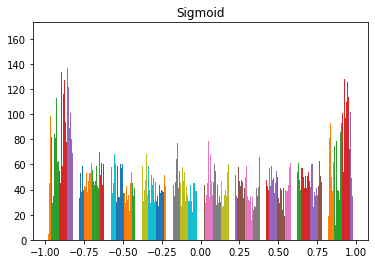

In [20]:
plt.hist(K)
plt.title('Sigmoid')
plt.show()

In [21]:
K = kernelFunc('lap', df_scl, df_scl)
K = pd.DataFrame(K)
K = round(K, 4)
K

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0000,0.1239,0.0427,0.0326,0.0542,0.0142,0.0362,0.0303,0.0142,0.0112,...,0.0199,0.0202,0.0059,0.0093,0.0118,0.0075,0.0196,0.0268,0.0213,0.0123
1,0.1239,1.0000,0.0411,0.0541,0.0219,0.0089,0.0510,0.0387,0.0114,0.0097,...,0.0164,0.0130,0.0059,0.0048,0.0126,0.0231,0.0336,0.0092,0.0099,0.0139
2,0.0427,0.0411,1.0000,0.1835,0.0110,0.0068,0.0228,0.0347,0.0046,0.0089,...,0.0192,0.0116,0.0063,0.0025,0.0117,0.0083,0.0111,0.0081,0.0098,0.0047
3,0.0326,0.0541,0.1835,1.0000,0.0123,0.0077,0.0310,0.0277,0.0042,0.0069,...,0.0178,0.0121,0.0051,0.0022,0.0088,0.0136,0.0152,0.0055,0.0067,0.0074
4,0.0542,0.0219,0.0110,0.0123,1.0000,0.0931,0.0087,0.0057,0.0093,0.0084,...,0.0074,0.0082,0.0037,0.0045,0.0066,0.0035,0.0081,0.0122,0.0054,0.0048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0075,0.0231,0.0083,0.0136,0.0035,0.0020,0.0101,0.0082,0.0081,0.0067,...,0.0059,0.0035,0.0045,0.0017,0.0457,1.0000,0.0188,0.0054,0.0121,0.0100
496,0.0196,0.0336,0.0111,0.0152,0.0081,0.0039,0.0131,0.0136,0.0041,0.0034,...,0.0092,0.0074,0.0056,0.0040,0.0078,0.0188,1.0000,0.1014,0.0147,0.0087
497,0.0268,0.0092,0.0081,0.0055,0.0122,0.0044,0.0067,0.0060,0.0037,0.0017,...,0.0055,0.0067,0.0069,0.0075,0.0059,0.0054,0.1014,1.0000,0.0249,0.0078
498,0.0213,0.0099,0.0098,0.0067,0.0054,0.0045,0.0075,0.0074,0.0075,0.0046,...,0.0043,0.0031,0.0056,0.0026,0.0120,0.0121,0.0147,0.0249,1.0000,0.0906


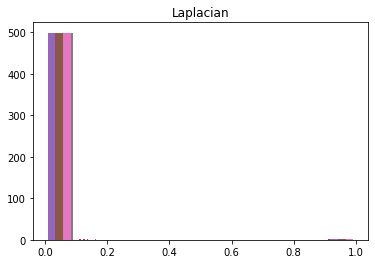

In [22]:
plt.hist(K)
plt.title('Laplacian')
plt.show()

## Data mix with test

In [25]:
K = kernelFunc('gauss', df_scl, dtst)
K = pd.DataFrame(K)
K = round(K, 4)
K

,0,1,2,3,4,5,6,7,8,9,...,950,951,952,953,954,955,956,957,958,959
0,0.0216,0.0114,0.0262,0.0263,0.0194,0.0108,0.0103,0.0116,0.0193,0.0345,...,0.1099,0.1092,0.0156,0.0382,0.0355,0.0701,0.0382,0.0210,0.0357,0.0412
1,0.0202,0.0579,0.0110,0.0109,0.0237,0.0016,0.0024,0.0145,0.0060,0.0411,...,0.0196,0.0179,0.0045,0.0151,0.0306,0.0247,0.0151,0.0336,0.0198,0.0187
2,0.0037,0.0015,0.0199,0.0050,0.0056,0.0146,0.0045,0.0119,0.0401,0.0139,...,0.0046,0.0020,0.0013,0.0015,0.0107,0.0353,0.0198,0.0234,0.0413,0.0440
3,0.0104,0.0098,0.0067,0.0109,0.0023,0.0021,0.0031,0.0096,0.0064,0.0071,...,0.0032,0.0034,0.0033,0.0006,0.0126,0.0154,0.0225,0.0126,0.0185,0.0483
4,0.0005,0.0002,0.0003,0.0003,0.0003,0.0002,0.0004,0.0004,0.0003,0.0008,...,0.0046,0.0092,0.0008,0.0029,0.0032,0.0071,0.0015,0.0036,0.0060,0.0018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0014,0.0034,0.0001,0.0004,0.0011,0.0001,0.0002,0.0008,0.0001,0.0006,...,0.0002,0.0002,0.0008,0.0001,0.0034,0.0070,0.0077,0.0060,0.0012,0.0027
496,0.0055,0.0091,0.0051,0.0037,0.0056,0.0008,0.0038,0.0090,0.0019,0.0100,...,0.0022,0.0015,0.0007,0.0023,0.0028,0.0043,0.0020,0.0024,0.0026,0.0011
497,0.0039,0.0016,0.0050,0.0050,0.0008,0.0009,0.0052,0.0052,0.0021,0.0044,...,0.0020,0.0035,0.0007,0.0020,0.0008,0.0037,0.0006,0.0011,0.0026,0.0006
498,0.0010,0.0019,0.0018,0.0022,0.0018,0.0014,0.0015,0.0008,0.0024,0.0021,...,0.0011,0.0017,0.0009,0.0006,0.0007,0.0114,0.0028,0.0065,0.0049,0.0011


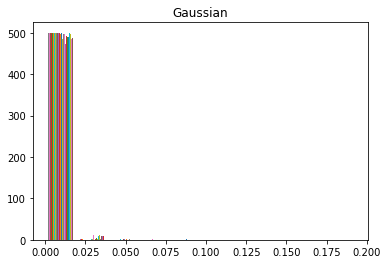

In [26]:
plt.hist(K)
plt.title('Gaussian')
plt.show()

In [27]:
K = kernelFunc('lin', df_scl, dtst)
K = pd.DataFrame(K)
K = round(K, 4)
K

,0,1,2,3,4,5,6,7,8,9,...,950,951,952,953,954,955,956,957,958,959
0,2.4530,-0.8094,4.8952,3.5139,2.2301,4.5994,2.9725,2.2023,3.4688,3.0031,...,8.2090,7.6676,-0.2244,6.3637,0.3041,1.0534,-0.2895,-1.7307,1.1564,2.6819
1,4.3054,9.5179,2.7730,1.3220,5.4197,-2.7777,-2.0418,5.5198,-0.1932,6.0750,...,1.7993,0.8164,-4.2922,3.9072,1.7579,-1.9615,-2.7420,2.8189,0.4062,0.9365
2,1.3759,-3.1323,11.2608,2.9945,3.7703,13.8539,6.5607,10.0504,14.8881,6.1926,...,0.0746,-4.5004,-5.0434,-2.1505,2.0411,5.3656,4.1787,6.5509,9.6408,10.7596
3,7.2145,6.8556,6.5052,7.5377,-0.0298,4.8272,5.4007,9.6337,6.3741,3.5176,...,-1.0661,-1.2101,0.3524,-5.7518,3.5421,1.8945,5.4836,4.1347,6.2806,11.8815
4,-1.4292,-5.5912,-3.0609,-5.0917,-4.6229,-0.2740,0.8672,0.3826,-2.1447,-1.4400,...,6.9769,9.9183,-0.4050,8.0485,2.9132,4.2108,-1.8574,4.1093,6.8070,1.6224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3.3782,7.7826,-7.1014,-3.1160,2.6894,-5.7318,-2.5266,3.3153,-6.8172,-2.3459,...,-8.2819,-9.9836,-0.6276,-10.2839,3.1890,4.1036,6.2771,6.6278,-1.1906,3.6176
496,4.6646,7.0897,5.7336,2.7866,5.0467,0.8658,6.9568,9.9883,0.8910,5.8310,...,-2.4038,-4.8150,-6.3971,1.2951,-3.3632,-3.9061,-5.8883,-3.5643,-2.9053,-6.5412
497,6.5535,1.9148,9.2605,7.9140,-0.7757,5.0289,12.2285,10.8416,5.0812,5.3248,...,0.9209,3.1501,-3.4431,4.2063,-5.9959,-1.0129,-8.4329,-3.8402,0.6462,-5.9733
498,-1.6587,1.5971,2.9299,2.5580,1.8140,5.6885,4.7822,0.4368,4.3719,0.4034,...,-3.5835,-1.8750,-2.9864,-2.9390,-7.8371,3.3209,-1.9454,3.7643,2.6135,-3.8685


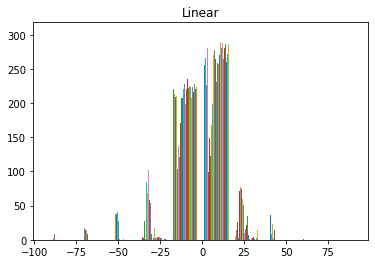

In [28]:
plt.hist(K)
plt.title('Linear')
plt.show()

In [29]:
K = kernelFunc('poly', df_scl, dtst)
K = pd.DataFrame(K)
K = round(K, 4)
K

,0,1,2,3,4,5,6,7,8,9,...,950,951,952,953,954,955,956,957,958,959
0,0.3055,-0.0744,0.7291,0.4749,0.2727,0.6715,0.3856,0.2687,0.4672,0.3905,...,1.4948,1.3547,-0.0219,1.0413,0.0313,0.1164,-0.0281,-0.1431,0.1290,0.3401
1,0.6159,1.8577,0.3542,0.1497,0.8357,-0.2006,-0.1625,0.8567,-0.0189,0.9766,...,0.2123,0.0883,-0.2450,0.5434,0.2067,-0.1577,-0.1990,0.3614,0.0423,0.1024
2,0.1565,-0.2151,2.3941,0.3891,0.5192,3.3047,1.0865,2.0151,3.7053,1.0027,...,0.0075,-0.2475,-0.2500,-0.1688,0.2458,0.8245,0.5925,1.0842,1.8935,2.2336
3,1.2419,1.1555,1.0737,1.3219,-0.0030,0.7157,0.8317,1.8915,1.0437,0.4755,...,-0.0952,-0.1064,0.0365,-0.2443,0.4797,0.2253,0.8490,0.5844,1.0225,2.5999
4,-0.1225,-0.2465,-0.2124,-0.2499,-0.2486,-0.0266,0.0942,0.0397,-0.1685,-0.1233,...,1.1845,1.9756,-0.0389,1.4526,0.3762,0.5984,-0.1512,0.5798,1.1441,0.1886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.4519,1.3839,-0.2058,-0.2145,0.3413,-0.2446,-0.1888,0.4414,-0.2170,-0.1796,...,-0.1423,-0.0016,-0.0588,0.0292,0.4206,0.5788,1.0217,1.1021,-0.1049,0.4926
496,0.6840,1.2116,0.9021,0.3563,0.7594,0.0941,1.1797,1.9965,0.0970,0.9231,...,-0.1826,-0.2497,-0.2305,0.1463,-0.2232,-0.2380,-0.2421,-0.2294,-0.2061,-0.2262
497,1.0848,0.2281,1.7836,1.4177,-0.0716,0.7558,2.7182,2.2595,0.7663,0.8160,...,0.1006,0.4142,-0.2258,0.5976,-0.2401,-0.0910,-0.1322,-0.2365,0.0688,-0.2405
498,-0.1384,0.1852,0.3788,0.3212,0.2143,0.8924,0.7069,0.0456,0.6283,0.0420,...,-0.2299,-0.1523,-0.2095,-0.2075,-0.1695,0.4424,-0.1567,0.5181,0.3297,-0.2372


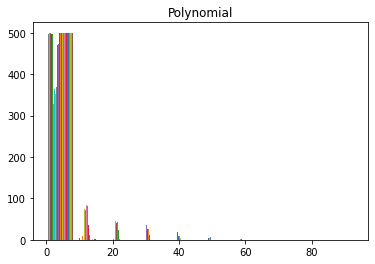

In [30]:
plt.hist(K)
plt.title('Polynomial')
plt.show()

In [31]:
K = kernelFunc('sig', df_scl, dtst)
K = pd.DataFrame(K)
K = round(K, 4)
K

,0,1,2,3,4,5,6,7,8,9,...,950,951,952,953,954,955,956,957,958,959
0,0.2405,-0.0808,0.4538,0.3376,0.2194,0.4300,0.2888,0.2167,0.3336,0.2916,...,0.6756,0.6450,-0.0224,0.5624,0.0304,0.1049,-0.0289,-0.1714,0.1151,0.2619
1,0.4058,0.7406,0.2704,0.1314,0.4945,-0.2708,-0.2014,0.5020,-0.0193,0.5424,...,0.1780,0.0815,-0.4047,0.3720,0.1740,-0.1937,-0.2675,0.2747,0.0406,0.0934
2,0.1367,-0.3034,0.8097,0.2908,0.3601,0.8822,0.5757,0.7637,0.9031,0.5506,...,0.0075,-0.4219,-0.4655,-0.2118,0.2013,0.4904,0.3951,0.5751,0.7461,0.7917
3,0.6178,0.5951,0.5720,0.6374,-0.0030,0.4484,0.4930,0.7458,0.5631,0.3379,...,-0.1062,-0.1204,0.0352,-0.5192,0.3401,0.1872,0.4993,0.3914,0.5567,0.8300
4,-0.1420,-0.5073,-0.2969,-0.4693,-0.4320,-0.0274,0.0865,0.0382,-0.2112,-0.1430,...,0.6029,0.7581,-0.0405,0.6667,0.2834,0.3978,-0.1836,0.3893,0.5920,0.1608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.3255,0.6517,-0.6108,-0.3019,0.2626,-0.5177,-0.2474,0.3199,-0.5926,-0.2304,...,-0.6795,-0.7609,-0.0627,-0.7733,0.3085,0.3888,0.5565,0.5802,-0.1185,0.3468
496,0.4353,0.6100,0.5178,0.2717,0.4658,0.0864,0.6016,0.7611,0.0889,0.5249,...,-0.2359,-0.4474,-0.5647,0.1288,-0.3242,-0.3719,-0.5291,-0.3421,-0.2826,-0.5744
497,0.5753,0.1892,0.7287,0.6592,-0.0774,0.4644,0.8405,0.7947,0.4685,0.4873,...,0.0918,0.3050,-0.3313,0.3975,-0.5368,-0.1009,-0.6875,-0.3662,0.0645,-0.5351
498,-0.1644,0.1584,0.2849,0.2504,0.1794,0.5145,0.4448,0.0437,0.4113,0.0403,...,-0.3438,-0.1853,-0.2901,-0.2857,-0.6548,0.3204,-0.1921,0.3596,0.2556,-0.3686


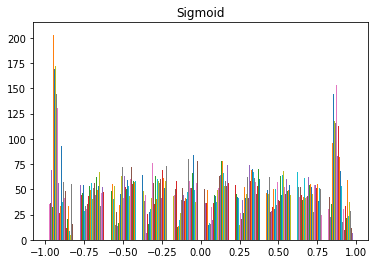

In [32]:
plt.hist(K)
plt.title('Sigmoid')
plt.show()

In [33]:
K = kernelFunc('lap', df_scl, dtst)
K = pd.DataFrame(K)
K = round(K, 4)
K

,0,1,2,3,4,5,6,7,8,9,...,950,951,952,953,954,955,956,957,958,959
0,0.0784,0.0422,0.0486,0.0467,0.0506,0.0381,0.0286,0.0335,0.0440,0.0672,...,0.0869,0.0898,0.0311,0.0490,0.0489,0.0581,0.0582,0.0408,0.0462,0.0470
1,0.0526,0.0812,0.0306,0.0328,0.0534,0.0151,0.0204,0.0332,0.0333,0.0598,...,0.0471,0.0375,0.0214,0.0281,0.0432,0.0412,0.0334,0.0462,0.0338,0.0365
2,0.0249,0.0134,0.0353,0.0192,0.0243,0.0330,0.0154,0.0229,0.0435,0.0256,...,0.0200,0.0115,0.0084,0.0081,0.0245,0.0356,0.0318,0.0343,0.0449,0.0454
3,0.0227,0.0235,0.0192,0.0273,0.0175,0.0170,0.0176,0.0215,0.0202,0.0220,...,0.0179,0.0146,0.0111,0.0062,0.0216,0.0298,0.0380,0.0227,0.0277,0.0452
4,0.0131,0.0089,0.0103,0.0090,0.0110,0.0100,0.0108,0.0099,0.0086,0.0121,...,0.0168,0.0222,0.0097,0.0159,0.0148,0.0214,0.0162,0.0146,0.0178,0.0135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0077,0.0123,0.0054,0.0058,0.0085,0.0037,0.0034,0.0045,0.0045,0.0061,...,0.0064,0.0044,0.0059,0.0036,0.0113,0.0151,0.0157,0.0161,0.0063,0.0069
496,0.0156,0.0183,0.0152,0.0166,0.0169,0.0085,0.0175,0.0205,0.0098,0.0213,...,0.0137,0.0113,0.0088,0.0112,0.0146,0.0170,0.0110,0.0112,0.0103,0.0085
497,0.0152,0.0086,0.0144,0.0135,0.0080,0.0082,0.0159,0.0169,0.0089,0.0127,...,0.0101,0.0116,0.0060,0.0088,0.0082,0.0137,0.0078,0.0073,0.0101,0.0063
498,0.0087,0.0108,0.0107,0.0125,0.0097,0.0077,0.0094,0.0070,0.0096,0.0100,...,0.0092,0.0093,0.0071,0.0079,0.0084,0.0228,0.0094,0.0175,0.0179,0.0076


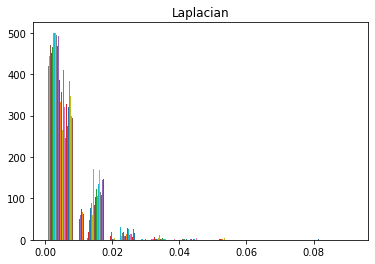

In [34]:
plt.hist(K)
plt.title('Laplacian')
plt.show()